In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [3]:
# Set path

path = r'C:\Users\Marce\careerfoundry\Instacart Basket Analysis'

In [4]:
# Import dataframe from pickle

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'allinone.pkl'))

In [5]:
# View all columns

pd.set_option('display.max_columns', None)

In [ ]:
df.head(10)

In [6]:
#new dataframe to work with

df_new =  df

In [ ]:
df_new.columns

In [7]:
#creating a list with if conditions to separate states in geographic regions

result = []

for value in df_new["State"]:
  if value in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
    result.append("Northeast")
  elif value in ('Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
   result.append("Midwest")
  elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
   result.append("South")
  elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
   result.append("West")

In [8]:
#creating a new column from the list

df_new["Region"] = result

In [9]:
df_new["Region"].value_counts(dropna = False)

South        8127783
West         6257904
Midwest      5710796
Northeast    4314683
Name: Region, dtype: int64

In [9]:
#creating a crosstab between region and spending_flag

crosstab = pd.crosstab(df_new['Region'], df_new['spending_flag'], dropna = False)

In [10]:
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,118248,5592548
Northeast,82029,4232654
South,157899,7969884
West,120826,6137078


In [10]:
# creating a list for a new column "Relevance"
####what do you call an elephant that doesn't matter?

result=[]

for value in df_new["order_number"]:
  if value < 5:
    result.append("Irrelephant")
  elif value >=5:
    result.append("Relevant")
  else:
    result.append("Problem")

In [11]:
# new column based on list

df_new['Relevance'] = result

In [12]:
df_new['Relevance'].value_counts(dropna = False) 

Relevant    24411166
Name: Relevance, dtype: int64

In [ ]:
df_new.columns

In [13]:
#creating new dataframe with only relevant customers

df_rel = df_new[df_new["Relevance"].str.contains("Irrelephant")==False]

In [14]:
df_rel['Relevance'].value_counts(dropna = False)

Relevant    24411166
Name: Relevance, dtype: int64

In [ ]:
# exporting new dataframe "df_rel" in pickle format

df_rel.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'relevant.pkl' ))

In [ ]:
# creating a flag for 'Young Parent' based on age, dependants

df_rel.loc[((df_rel['Age'] >= 18) & (df_rel['Age'] <= 35) & (df_rel['Dependants'] >= 1)), 'Parent_Status'] = 'Young parent'

In [ ]:
# creating a flag for 'Single adult' based on age, dependants

df_rel.loc[(df_rel['Dependants'] == 0), 'Parent_Status'] = 'Single adult'

In [ ]:
# creating a flag for 'Middle age parent' based on age, dependants

df_rel.loc[(df_rel['Age'] >= 35) & (df_rel['Age'] <= 60) & (df_rel['Dependants'] >= 1), 'Parent_Status'] = 'Middle age parent'

In [ ]:
# creating a flag for 'Older parent' based on age, dependants

df_rel.loc[(df_rel['Age'] >= 60) & (df_rel['Dependants'] >= 1), 'Parent_Status'] = 'Older parent'

In [ ]:
# checking frequency of new column "Parent Status"

df_rel["Parent_Status"].value_counts(dropna = False)

In [ ]:
df_rel['Parent_Status'].value_counts().plot.bar()

In [ ]:
# creating a bar chart based on column "Parent Status" and saving it

bar=df_rel['Parent_Status'].value_counts().plot.bar()
plt.tight_layout()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_status.png'))

In [16]:
# find mean, min, max for prices of "Parent Status"

df_rel.groupby('Parent_Status').agg({'prices': ['mean', 'min', 'max']})

prices           
                       mean  min   max
Parent_Status                         
Middle age parent  7.792145  1.0  25.0
Older parent       7.792533  1.0  25.0
Single adult       7.790987  1.0  25.0
Young parent       7.785727  1.0  25.0

In [17]:
# find mean, min, max for prices of "days_since_prior_order"

df_rel.groupby('Parent_Status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
Parent_Status                                      
Middle age parent              10.098064  0.0  30.0
Older parent                   10.092253  0.0  30.0
Single adult                   10.063515  0.0  30.0
Young parent                   10.083936  0.0  30.0

In [ ]:
# creating crosstab between "Parent Status" and "Region"

crosstab_cust_region = pd.crosstab(df_rel['Parent_Status'], df_rel['Region'], dropna = False)

In [ ]:
crosstab_cust_region

In [ ]:
crosstab_cust_region.to_clipboard()

In [ ]:
# plot and save bar char of crosstab

cust_region_bar = crosstab_cust_region.plot.bar(stacked=True, color=["blue", "orange", "green", "purple"])
plt.legend(title="Customer/Region")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_regions.png'))

In [ ]:
# creating crosstab

crosstab_cust_region = pd.crosstab(df_rel['department_id'], df_rel['Parent_Status'], dropna = False)

In [ ]:
# plot and save bar chart of crosstab

cust_region_bar = crosstab_cust_region.plot.bar()
plt.legend(title="Customer/Departments")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_department.png'))

In [ ]:
# creating a crosstab

crosstab_depend_depart = pd.crosstab(df_rel['department_id'], df_rel['Dependants'], dropna = False)

In [ ]:
# plot and save bar chart of crosstab

depend_depart = crosstab_depend_depart.plot.bar()
plt.legend(title="Dependants")
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_department.png'))

In [ ]:
df_rel.columns

In [ ]:
df_rel.head()

In [ ]:
df_rel["busiest_period_of_day"].value_counts(dropna = False)

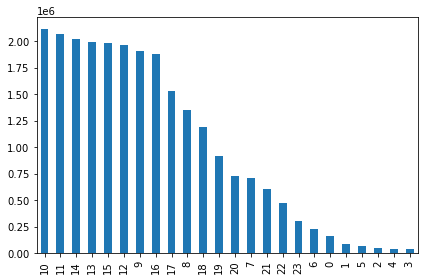

In [15]:
# creating a bar chart

bar_hour=df_rel['order_hour_of_day'].value_counts().plot.bar()
plt.tight_layout()
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour.png'))

In [ ]:
df_rel['product_name'].value_counts(dropna=False)

In [ ]:
# creating a bar chart for the top 10 most bought products
prodspop = df_rel['product_name'].value_counts(dropna=False).nlargest(10).plot.bar()
plt.tight_layout()
prodspop.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prodspop.png'))